## Postprocessing outputs from 4 dimensional problem or subproblem1 for 9 dimensional problem to receive final suggestions for experiments

This Notebook performs the postprocessing for the 4 dimensional problem or subproblem 1 of the 9 dimensional problem.

As components we have the polymer PA56, phytic acid, an amino-based component and a metallic-based component.

Here loaded from Outputs_orig folder corresponding to the results shown in the paper, but can also run Sampling_4components notebook and then load results from Outputs folder here


It contains the following steps:
1. Import all output files and format as data frames
2. LHS calculation and export to file, discrepancies and variance**
3. LHSMDU calculation and export to file, discrepancies and variance**
4. Import and format data set
5. Reduce to 2 dimensions and plot
6. Calculate other discrepancies and variance to check space filling properties/ uniformity
7. Distribution plots
8. Discrepancy for LHS and LHSMDU without constraints


written by Christina Schenk

last updated on 03/01/2025

tested on Christina's M1 Mac

#### Import Python Packages

In [1]:
import pandas as pd
import os
from pathlib import Path  
import csv
from scipy.stats import qmc
import lhsmdu
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append('..')
from src.plot import *
from src.conditionedSampling import *


### **1. Import all output files and format as data frames**

In [2]:
filename_lhs_amino = "Outputs/LHS_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_amino-based.csv"
filename_lhsmdu_amino = "Outputs/LHSMDU_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_amino-based.csv"
filename_lhs_metallic = "Outputs/LHS_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_metallic-based.csv"
filename_lhsmdu_metallic = "Outputs/LHSMDU_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_metallic-based.csv"
filename_lhs = "Outputs/LHS_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_improve.csv"
filename_lhsmdu = "Outputs/LHSMDU_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_improve.csv"
#path = "$HOME/Programs/gpCAM/examples/gpcam_my_examples/DigiBioFAM/
#path = "$HOME/Programs/gpCAM/examples/gpcam_my_examples/DigiBioFAM/

df_lhs_amino = pd.read_csv(filename_lhs_amino)#, sep=';', decimal=",")
df_lhs_amino = df_lhs_amino.loc[:, ~df_lhs_amino.columns.str.contains('^Unnamed')]
df_lhsmdu_amino = pd.read_csv(filename_lhsmdu_amino)#, sep=';', decimal=",")
df_lhsmdu_amino = df_lhsmdu_amino.loc[:, ~df_lhsmdu_amino.columns.str.contains('^Unnamed')]
df_lhs_metallic = pd.read_csv(filename_lhs_metallic)#, sep=';', decimal=",")
df_lhs_metallic = df_lhs_metallic.loc[:, ~df_lhs_metallic.columns.str.contains('^Unnamed')]
df_lhsmdu_metallic = pd.read_csv(filename_lhsmdu_metallic)#, sep=';', decimal=",")
df_lhsmdu_metallic = df_lhsmdu_metallic.loc[:, ~df_lhsmdu_metallic.columns.str.contains('^Unnamed')]
df_lhs = pd.read_csv(filename_lhs)#, sep=';', decimal=",")
df_lhs = df_lhs.loc[:, ~df_lhs.columns.str.contains('^Unnamed')]
df_lhsmdu= pd.read_csv(filename_lhsmdu)#, sep=';', decimal=",")
df_lhsmdu = df_lhsmdu.loc[:, ~df_lhsmdu.columns.str.contains('^Unnamed')]


In [3]:
df_lhs.columns = ["PA56", "PhA", "amino-based", "metallic-based"]
df_lhsmdu.columns = ["PA56", "PhA", "amino-based", "metallic-based"]
df_lhs_amino.columns = ["MEL", "THAM", "CS", "BN"]
df_lhsmdu_amino.columns = ["MEL", "THAM", "CS", "BN"]
df_lhs_metallic.columns = ["ZnBO", "CABO", "HNT"]
df_lhsmdu_metallic.columns = ["ZnBO", "CABO", "HNT"]

### **2. LHS calculation and export to file, discrepancies and variance**

In [4]:
column_names = [df_lhs.columns.values.tolist(), df_lhs_amino.columns.values.tolist(), df_lhs_metallic.columns.values.tolist()]
df_all = pd.concat([df_lhs, df_lhs_amino, df_lhs_metallic], axis=1, join="inner")


In [5]:
df_all

,PA56,PhA,amino-based,metallic-based,MEL,THAM,CS,BN,ZnBO,CABO,HNT
0,0.922,0.023,0.017,0.037,0.550768,0.000000,0.449232,0.0,1.0,0.0,0.0
1,0.892,0.007,0.038,0.062,1.000000,0.000000,0.000000,0.0,0.0,1.0,0.0
2,0.901,0.023,0.028,0.048,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0
3,0.916,0.008,0.009,0.066,0.000000,0.000000,1.000000,0.0,1.0,0.0,0.0
4,0.874,0.049,0.039,0.038,0.616499,0.000000,0.383501,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
85,0.912,0.048,0.003,0.037,0.550768,0.000000,0.449232,0.0,0.0,0.0,1.0
86,0.952,0.031,0.003,0.014,0.000000,0.969845,0.030155,0.0,1.0,0.0,0.0
87,0.860,0.000,0.095,0.045,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0
88,0.821,0.029,0.010,0.140,0.000000,0.000000,1.000000,0.0,0.0,1.0,0.0


In [6]:
df_all["MEL"] = df_all["MEL"]*df_all["amino-based"]
df_all["MEL"] = df_all["MEL"].round(3)
df_all["THAM"] = df_all["THAM"]*df_all["amino-based"]
df_all["THAM"] = df_all["THAM"].round(3)
df_all["CS"] = df_all["CS"]*df_all["amino-based"]
df_all["CS"] = df_all["CS"].round(3)
df_all["BN"] = df_all["BN"]*df_all["amino-based"]
df_all["BN"] = df_all["BN"].round(3)

In [7]:
df_all["ZnBO"] = df_all["ZnBO"]*df_all["metallic-based"]
df_all["ZnBO"] = df_all["ZnBO"].round(3)
df_all["CABO"] = df_all["CABO"]*df_all["metallic-based"]
df_all["CABO"] = df_all["CABO"].round(3)
df_all["HNT"] = df_all["HNT"]*df_all["metallic-based"]
df_all["HNT"] = df_all["HNT"].round(3)

In [8]:
df_all = df_all.drop(['amino-based', 'metallic-based'], axis=1)

In [9]:
df_perc = df_all*100

#### Make sure that add up to 1, if not randomly take one where add error

In [10]:
for i in range(len(df_lhs)):
    if abs(df_lhs.iloc[i,:].sum()-1)>1e-4:
        ind_list = np.where(df_lhs.iloc[i,:]!=0)[0]
        ind = np.random.choice(ind_list)
        df_lhs.iloc[i,ind] = df_lhs.iloc[i,ind] - (df_lhs.iloc[i,:].sum()-1)
        #print(ind)
        #print(i, df_lhs.loc[i,:].sum())

In [11]:
df_perc

,PA56,PhA,MEL,THAM,CS,BN,ZnBO,CABO,HNT
0,92.2,2.3,0.9,0.0,0.8,0.0,3.7,0.0,0.0
1,89.2,0.7,3.8,0.0,0.0,0.0,0.0,6.2,0.0
2,90.1,2.3,0.0,0.0,0.0,2.8,0.0,0.0,4.8
3,91.6,0.8,0.0,0.0,0.9,0.0,6.6,0.0,0.0
4,87.4,4.9,2.4,0.0,1.5,0.0,0.0,0.0,3.8
...,...,...,...,...,...,...,...,...,...
85,91.2,4.8,0.2,0.0,0.1,0.0,0.0,0.0,3.7
86,95.2,3.1,0.0,0.3,0.0,0.0,1.4,0.0,0.0
87,86.0,0.0,0.0,0.0,0.0,9.5,4.5,0.0,0.0
88,82.1,2.9,0.0,0.0,1.0,0.0,0.0,14.0,0.0


#### Define bounds, space and calculate discrepancies and variance for comparison

In [12]:
l_bounds = [0.8, 0, 0, 0]
u_bounds = [1., 0.05, 0.1, 0.14]
# Combine lower and upper bounds into the desired format
bounds = [[lb, ub] for lb, ub in zip(l_bounds, u_bounds)]
space = qmc.scale(df_lhs, l_bounds, u_bounds, reverse=True)

In [13]:
qmc.discrepancy(space)

0.05374948481948026

In [14]:
qmc.discrepancy(space, method='WD')

0.054076568696142496

In [15]:
np.linalg.norm(space.var())

np.float64(0.0820970638660557)

In [16]:
filepath = Path('Outputs/postprocessed_outputs_4dim.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_lhs.to_csv(filepath) 

### **3. LHSMDU calculation and export to file, discrepancies and variance**

In [17]:
column_names = [df_lhsmdu.columns.values.tolist(), df_lhsmdu_amino.columns.values.tolist(), df_lhsmdu_metallic.columns.values.tolist()]
df_all_lhsmdu = pd.concat([df_lhsmdu, df_lhsmdu_amino, df_lhsmdu_metallic], axis=1, join="inner")


In [18]:
df_all_lhsmdu

,PA56,PhA,amino-based,metallic-based,MEL,THAM,CS,BN,ZnBO,CABO,HNT
0,0.900,0.024,0.014,0.061,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0
1,0.926,0.014,0.031,0.028,0.000000,0.776514,0.223486,0.0,0.0,0.0,1.0
2,0.904,0.032,0.043,0.020,0.583732,0.000000,0.416268,0.0,1.0,0.0,0.0
3,0.891,0.006,0.039,0.064,0.474525,0.000000,0.525475,0.0,0.0,1.0,0.0
4,0.864,0.044,0.022,0.070,0.000000,1.000000,0.000000,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
85,0.816,0.030,0.099,0.054,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0
86,0.806,0.046,0.088,0.060,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.0
87,0.953,0.033,0.003,0.011,0.000000,0.000000,1.000000,0.0,0.0,1.0,0.0
88,0.923,0.047,0.006,0.024,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.0


In [19]:
df_perc_lhsmdu = df_all_lhsmdu*100

In [20]:
space_lhsmdu = qmc.scale(df_lhsmdu, l_bounds, u_bounds, reverse=True)
qmc.discrepancy(space_lhsmdu)

0.051700209873128636

In [21]:
qmc.discrepancy(space_lhsmdu, method='WD')

0.04661421169093621

In [22]:
np.linalg.norm(space_lhsmdu.var())

np.float64(0.08173233323491434)

#### Make sure that add up to 1, if not randomly take one where add error

In [23]:
for i in range(len(df_lhsmdu)):
    if abs(df_lhsmdu.loc[i,:].sum()-1)>1e-4:
        ind_list = np.where(df_lhsmdu.loc[i,:]!=0)[0]
        ind = np.random.choice(ind_list)
        df_lhsmdu.iloc[i,ind] = df_lhsmdu.iloc[i,ind] - (df_lhsmdu.loc[i,:].sum()-1)
        #print(ind)
        #print(i, df_perc_lhsmdu.loc[i,:].sum())

In [24]:
filepath = Path('Outputs/postprocessed_outputs_without_selection_lhsmdu_all.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_all_lhsmdu.to_csv(filepath) 

### **4. Import and format data set**

In [25]:
filename = './data/Bank_Data-2808_mod_corrected.csv'#Bank_Data_mod_clean.csv'
df = pd.read_csv(filename, sep=';', decimal=",")
df = df.div(100.)
data_array = np.zeros((len(df),4))
data_array = np.column_stack((df['PA-56'].to_numpy(), df['PhA'], df['am-based'], df['met-based']))

#### Scaling of data

In [26]:
scaler = StandardScaler().fit(data_array)
data_scaled = scaler.transform(data_array)
scaler2 = StandardScaler().fit(df_all)
all_val_samples_scaled = scaler2.transform(df_all)
scaler3 = StandardScaler().fit(df_all_lhsmdu)
all_val_samples_mdu_scaled = scaler3.transform(df_all_lhsmdu)

### **5. Reduce to 2 dimensions and plot**

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


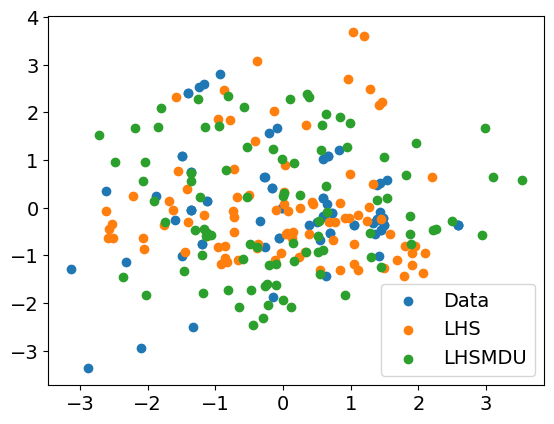

In [27]:
pca = PCA(n_components=2)
Xt1_pca = pca.fit_transform(data_scaled)
Xt2_pca = pca.fit_transform(all_val_samples_scaled)
Xt3_pca = pca.fit_transform(all_val_samples_mdu_scaled)  

plot_dimred_2dims_both_methods(Xt1_pca, Xt2_pca, Xt3_pca, filename_eps='Figures_4dim/plot_scaled_90pts.eps')

### Pairwise scatter and distribution plots

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


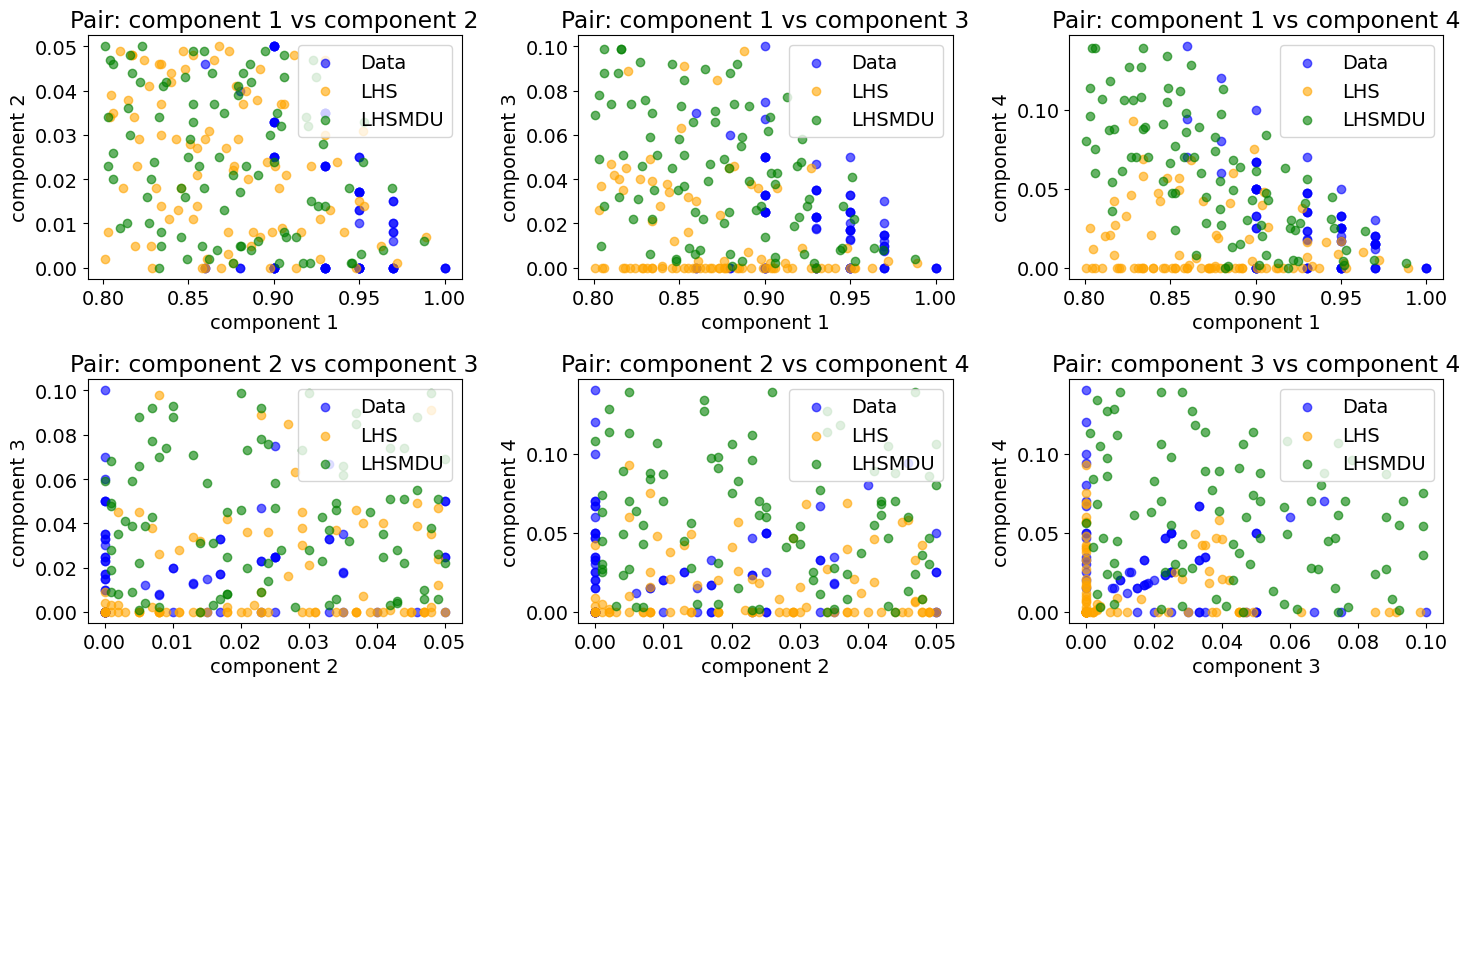

In [28]:
dim_labels = ['component 1', 'component 2', 'component 3', 'component 4']
create_pairwise_scatterplots(
    data=data_array,
    lhs=np.array(df_all),
    lhsmdu=np.array(df_all_lhsmdu),
    dim_labels=dim_labels,
    filename_eps='Figures_4dim/pairwiseplot_unscaled_90pts_4dim.eps'
)

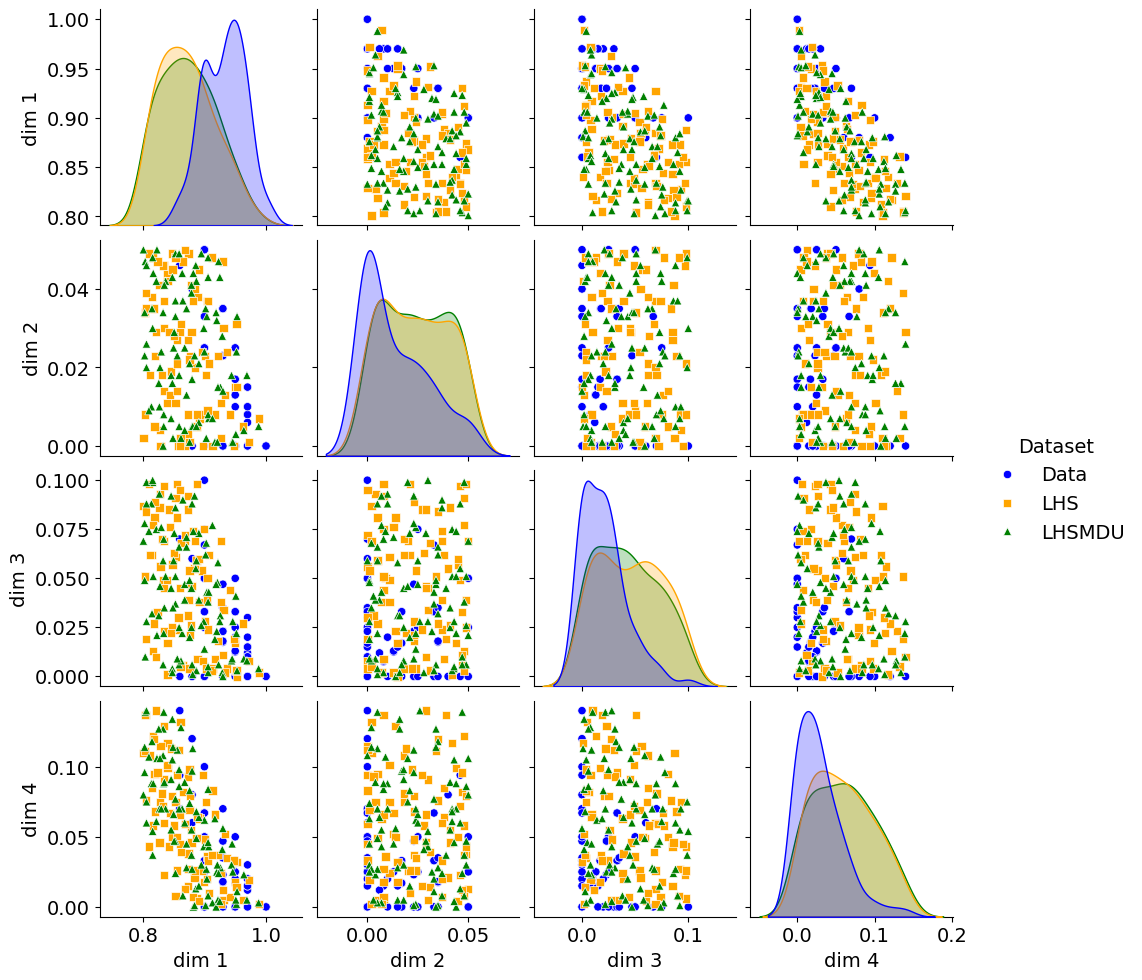

In [29]:
create_pairwise_distribution_plots_seaborn(data_array, np.array(df_lhs), np.array(df_lhsmdu), markers=["o", "s", "^"], filename_eps="Figures_4dim/pairwise_distributions_90pts_4dim.png")


In [30]:
tol = 5e-1
tol2 = 5e-1
des_n_samp = 15

tol_samples, tol_samples_LHSMDU, tol_samples_unscaled, tol_samples_LHSMDU_unscaled = select_samples_diff_from_data(exp_data=data_array, samples_LHS=df_lhs.to_numpy(), samples_LHSMDU=df_lhsmdu.to_numpy(), des_n_samp = des_n_samp, tol = tol, tol2 = tol2)


In [31]:
df_15_samps_scaled = pd.DataFrame(tol_samples,columns=['PA-56','PhA','am-based','met-based'])
df_15_samps = pd.DataFrame(tol_samples_unscaled,columns=['PA-56','PhA','am-based','met-based'])

#### Check if add up to 100%

In [32]:
df_perc = df_15_samps*100
for i in range(len(df_perc)):
    if abs(sum(df_perc.iloc[i,:])-100)>1e-2:
        print(sum(df_perc.iloc[i,:]))

In [33]:
df_perc

,PA-56,PhA,am-based,met-based
0,80.4,3.4,5.1,11.1
1,87.6,2.2,0.4,9.8
2,82.7,4.1,8.6,4.6
3,98.9,0.7,0.2,0.2
4,81.0,4.9,9.8,4.3
5,85.5,2.1,9.8,2.6
6,82.0,2.3,8.9,6.8
7,85.3,4.8,9.1,0.8
8,80.4,0.8,5.1,13.7
9,80.5,3.5,8.4,7.6


In [34]:
filepath = Path('Outputs/postprocessed_outputs_15lhs_4dim.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_perc.to_csv(filepath, float_format='%.1f') 

### **6. Calculate other discrepancies and variance to check space filling properties/uniformity**

In [35]:
space = qmc.scale(df_15_samps, l_bounds, u_bounds, reverse=True)
qmc.discrepancy(space)

0.16382070742782118

In [36]:
qmc.discrepancy(space, method='WD')

0.24139162378351758

In [37]:
np.linalg.norm(space.var())

np.float64(0.12121600113378686)

In [38]:
df_data = df[['PA-56','PhA','am-based','met-based']].copy()
df_data = df_data
df_with_data = pd.concat([df_15_samps, df_data], ignore_index=True, axis=0)

In [39]:
df_with_data

,PA-56,PhA,am-based,met-based
0,0.804,0.034,0.051,0.111
1,0.876,0.022,0.004,0.098
2,0.827,0.041,0.086,0.046
3,0.989,0.007,0.002,0.002
4,0.810,0.049,0.098,0.043
...,...,...,...,...
85,0.900,0.000,0.050,0.050
86,0.970,0.000,0.010,0.020
87,0.950,0.000,0.017,0.033
88,0.930,0.000,0.023,0.047


In [40]:
space = qmc.scale(df_with_data, l_bounds, u_bounds, reverse=True)
qmc.discrepancy(space)

0.3375982916158548

In [41]:
qmc.discrepancy(space, method='WD')

0.2600452045902266

In [42]:
np.linalg.norm(space.var())

np.float64(0.09747192176870748)

In [43]:
df_15_samps_lhsmdu = pd.DataFrame(tol_samples_LHSMDU_unscaled,columns=['PA-56','PhA','am-based','met-based'])
df_15_samps_lhsmdu_scaled = pd.DataFrame(tol_samples_LHSMDU,columns=['PA-56','PhA','am-based','met-based'])

#### Check if add up to 100%

In [44]:
df_perc_lhsmdu = df_15_samps_lhsmdu*100
for i in range(len(df_perc_lhsmdu)):
    if abs(sum(df_perc_lhsmdu.iloc[i,:])-100)>1e-2:
        print(sum(df_perc_lhsmdu.iloc[i,:]))

In [45]:
df_perc_lhsmdu

,PA-56,PhA,am-based,met-based
0,80.1,5.0,6.9,8.0
1,90.6,4.8,3.8,0.8
2,95.1,0.3,4.1,0.5
3,88.4,2.3,9.2,0.1
4,84.6,0.7,9.2,5.5
5,82.6,1.6,3.1,12.7
6,83.0,2.4,7.6,7.0
7,84.9,0.2,3.5,11.4
8,80.3,2.3,7.8,9.6
9,92.5,4.3,2.8,0.4


In [46]:
filepath = Path('Outputs/postprocessed_outputs_15lhsmdu_4dim.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_perc_lhsmdu.to_csv(filepath, float_format='%.1f') 

In [47]:
space = qmc.scale(df_15_samps_lhsmdu, l_bounds, u_bounds, reverse=True)
qmc.discrepancy(space)

0.11286546838418716

In [48]:
qmc.discrepancy(space, method='WD')

0.1221239096409469

In [49]:
np.linalg.norm(space.var())

np.float64(0.1061425695861678)

In [50]:
df_lhsmdu_with_data = pd.concat([df_15_samps_lhsmdu, df_data], ignore_index=True, axis=0)

In [51]:
space = qmc.scale(df_lhsmdu_with_data, l_bounds, u_bounds, reverse=True)
qmc.discrepancy(space)#default CD

0.33524504223910195

In [52]:
qmc.discrepancy(space, method='WD')

0.25281775384250676

In [53]:
np.linalg.norm(space.var())

np.float64(0.09484381377157344)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


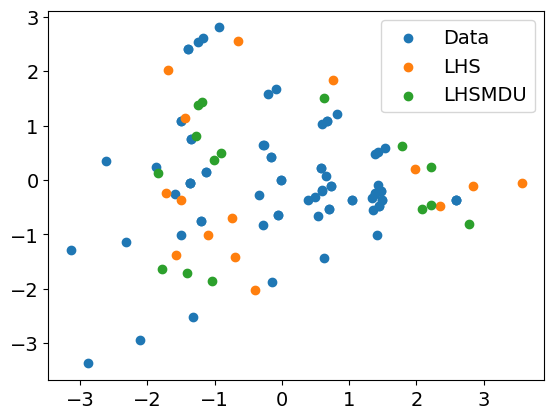

In [54]:
pca = PCA(n_components=2)
Xt1_pca = pca.fit_transform(data_scaled)
Xt2_pca = pca.fit_transform(df_15_samps_scaled)
Xt3_pca = pca.fit_transform(df_15_samps_lhsmdu_scaled)
    
plot_dimred_2dims_both_methods(Xt1_pca, Xt2_pca, Xt3_pca, filename_eps='Figures_4dim/plot_scaled_15pts.eps')

### Pairwise scatter and distribution plots

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


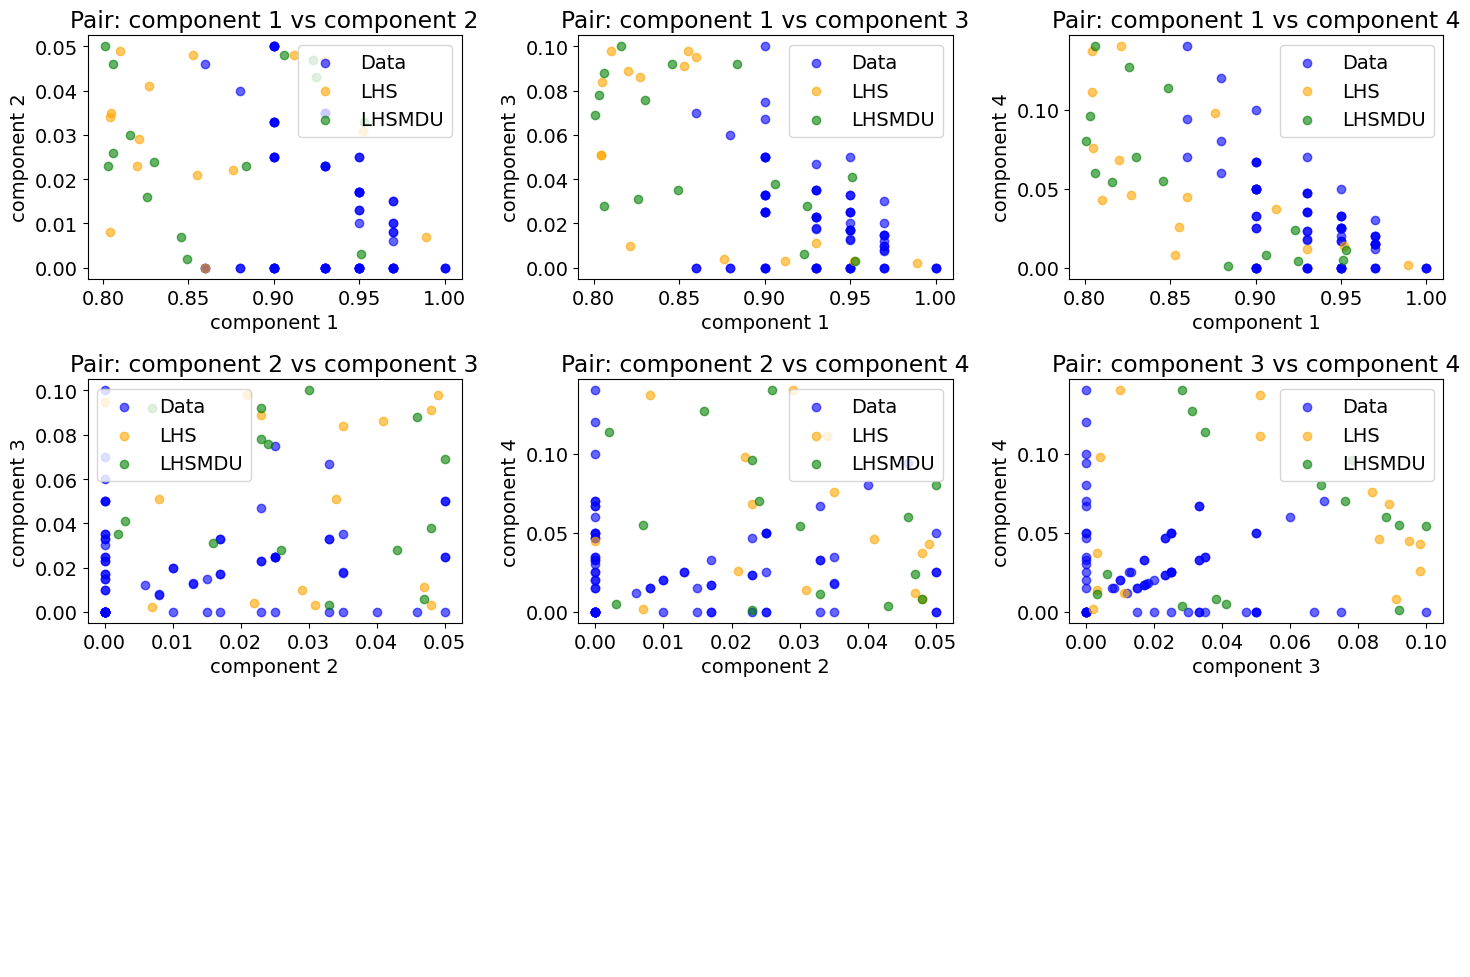

In [55]:
create_pairwise_scatterplots(
    data=data_array,
    lhs=np.array(df_15_samps),
    lhsmdu=np.array(df_15_samps_lhsmdu),
    dim_labels=dim_labels,
    filename_eps='Figures_4dim/pairwiseplot_unscaled_15pts_4dim.eps'
)

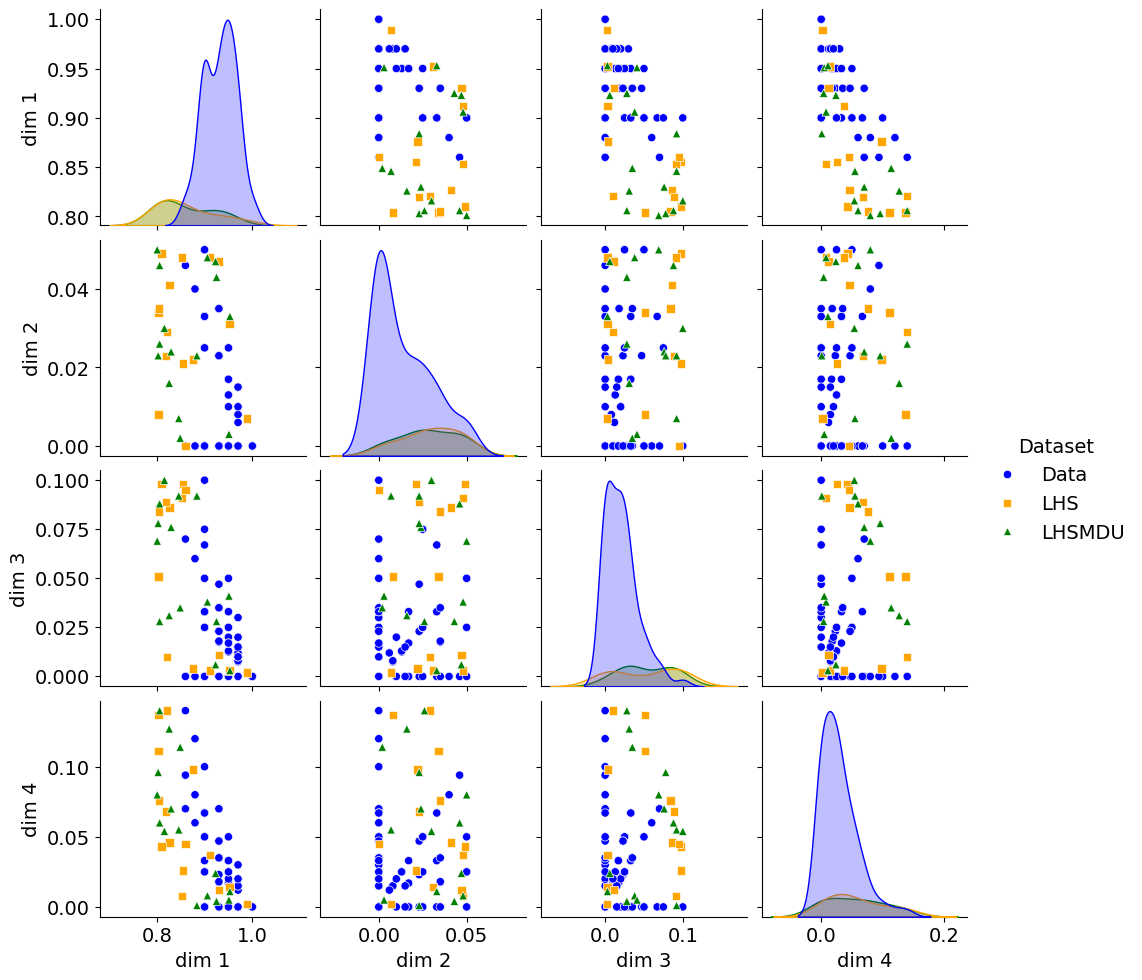

In [56]:
create_pairwise_distribution_plots_seaborn(data_array, lhs=np.array(df_15_samps),
    lhsmdu=np.array(df_15_samps_lhsmdu), markers=["o", "s", "^"], filename_eps="Figures_4dim/pairwise_distributions_15pts_4dim.png")


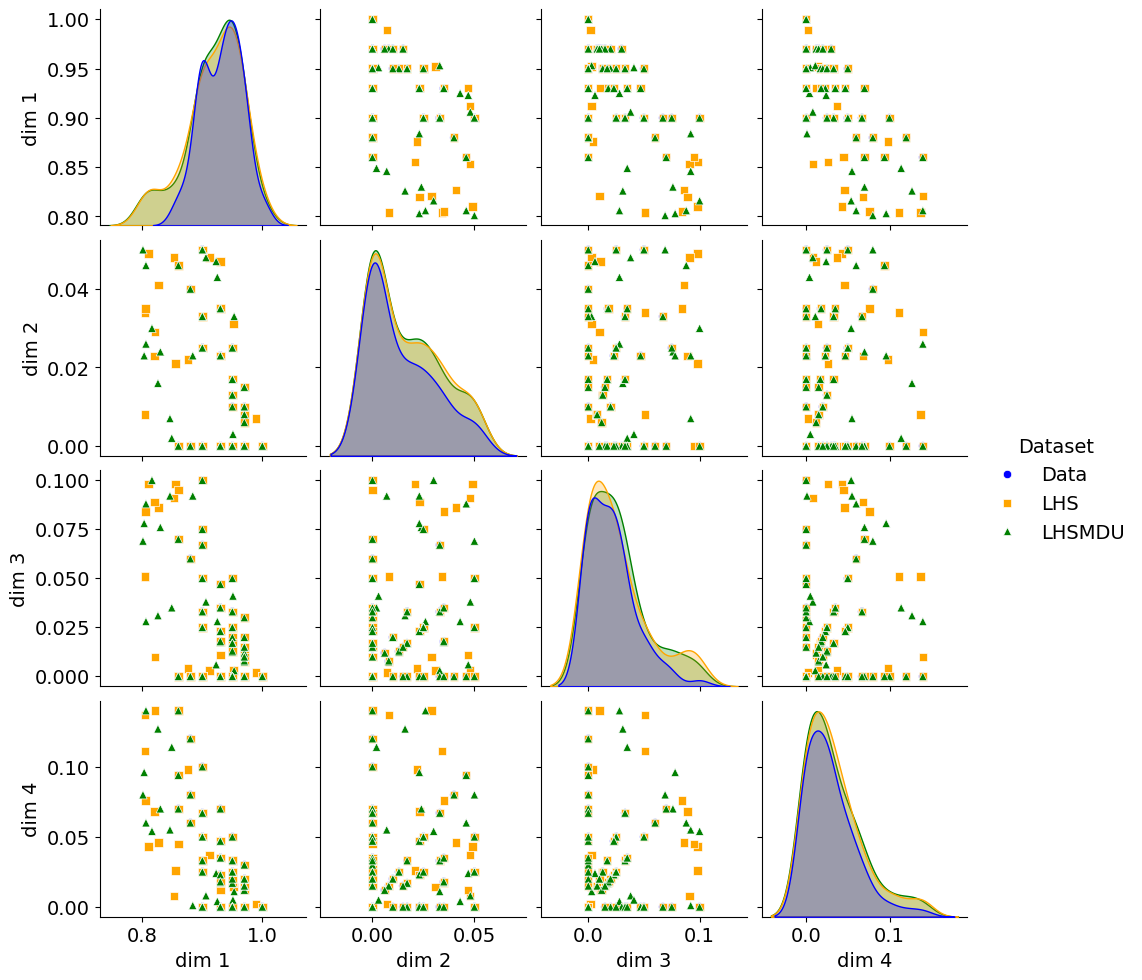

In [57]:
create_pairwise_distribution_plots_seaborn(data_array, lhs=np.array(df_with_data),
    lhsmdu=np.array(df_lhsmdu_with_data), markers=["o", "s", "^"], filename_eps="Figures_4dim/pairwise_distributions_15ptsplusdata_4dim.png")


### **7. Distribution plots**

#### Distribution subplots of unscaled data

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


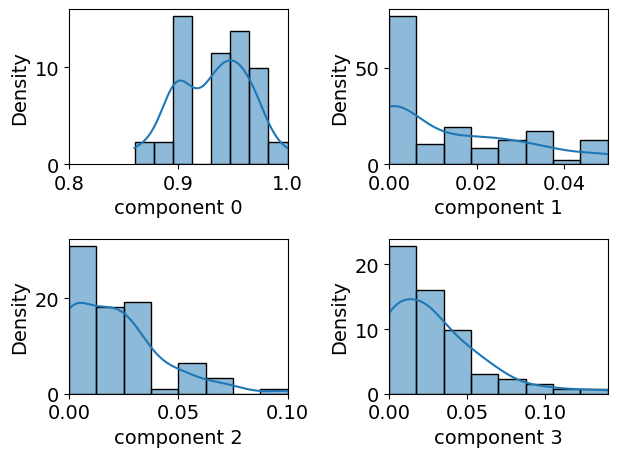

In [58]:
box_kdeplot_samples(data_array, filename_eps='Figures_4dim/dist_unscaled_expdata.eps', fixed_ranges=bounds)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


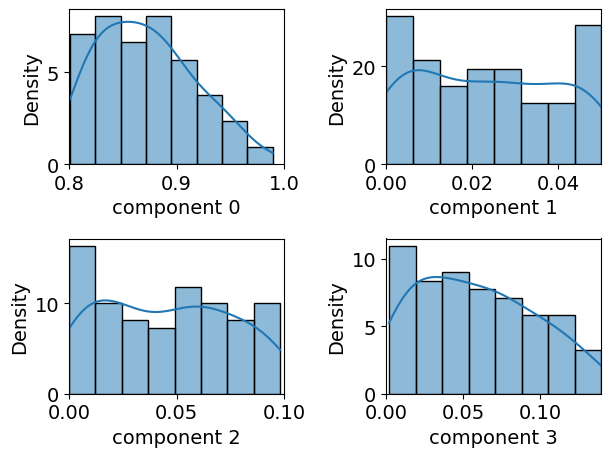

In [59]:
box_kdeplot_samples(df_lhs.to_numpy(), filename_eps='Figures_4dim/dist_unscaled_90ptsLHS.eps', fixed_ranges=bounds)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


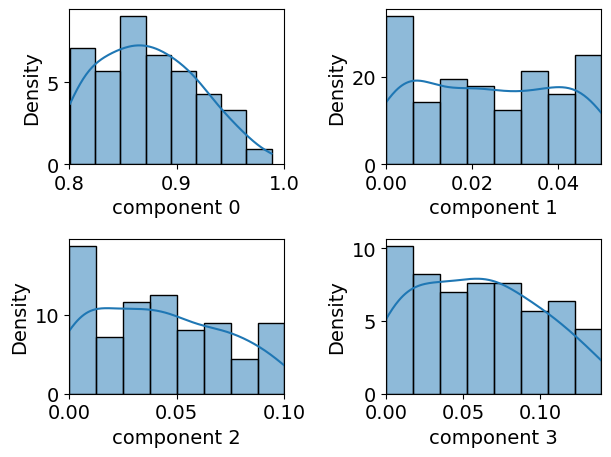

In [60]:
box_kdeplot_samples(df_lhsmdu.to_numpy(), filename_eps='Figures_4dim/dist_unscaled_90ptsLHSMDU.eps', fixed_ranges=bounds)

#### Distribution subplots of unscaled reduced data

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


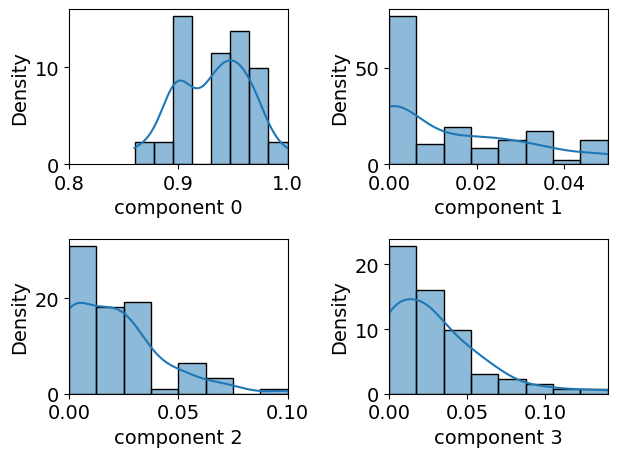

In [61]:
box_kdeplot_samples(data_array, filename_eps='Figures_4dim/dist_unscaled_expdata.eps', fixed_ranges=bounds)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


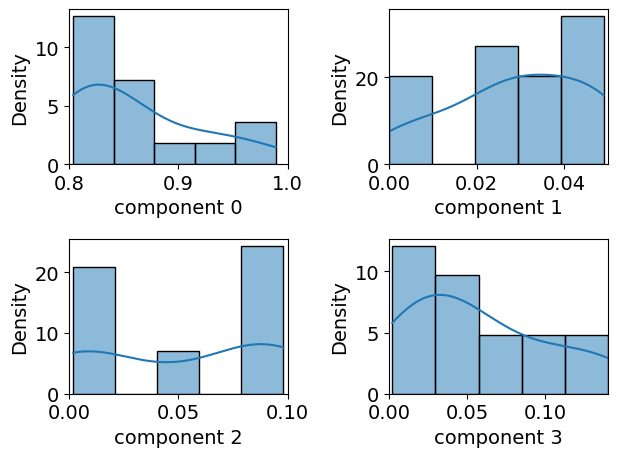

In [62]:
box_kdeplot_samples(tol_samples_unscaled, filename_eps='Figures_4dim/dist_unscaled_15ptsLHS.eps', fixed_ranges=bounds)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


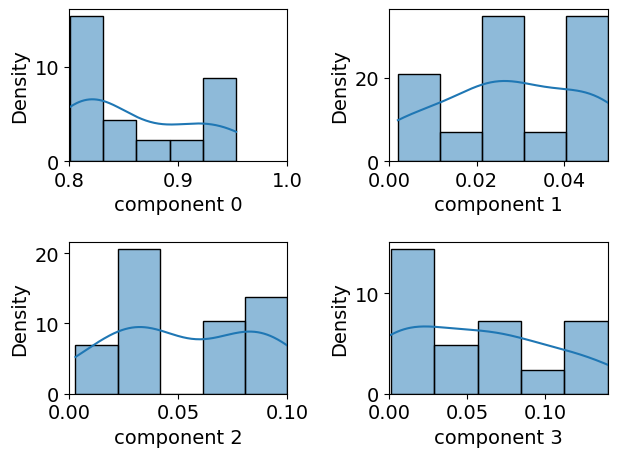

In [63]:
box_kdeplot_samples(tol_samples_LHSMDU_unscaled, filename_eps='Figures_4dim/dist_unscaled_15ptsLHSMDU.eps', fixed_ranges=bounds)